In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("../../../src/")

import nanonets_utils

In [9]:
df1 = pd.read_csv('data/Nx=10_Ny=10_Nz=1_Ne=8_0.csv')
# df2 = pd.read_csv('data/net_currents_Nx=10_Ny=10_Nz=1_Ne=8_0.csv')
# df3 = pd.read_csv('data/mean_state_Nx=10_Ny=10_Nz=1_Ne=8_0.csv')

for i in range(1,10):
    df1 = pd.concat([df1,pd.read_csv(f'data/Nx=10_Ny=10_Nz=1_Ne=8_{i}.csv')],ignore_index=True)
    # df2 = pd.concat([df2,pd.read_csv(f'data/net_currents_Nx=10_Ny=10_Nz=1_Ne=8_{i}.csv')],ignore_index=True)
    # df3 = pd.concat([df3,pd.read_csv(f'data/mean_state_Nx=10_Ny=10_Nz=1_Ne=8_{i}.csv')],ignore_index=True)

df1.to_csv('data/Nx=10_Ny=10_Nz=1_Ne=8.csv',index=False)
# df2.to_csv('data/net_currents_Nx=10_Ny=10_Nz=1_Ne=8.csv',index=False)
# df3.to_csv('data/mean_state_Nx=10_Ny=10_Nz=1_Ne=8.csv',index=False)

In [14]:
df1, df2 = nanonets_utils.get_boolean_data("data/", N=10, N_e=8, on_state=[0.1], i1_col=0, i2_col=1)

In [17]:
gates   = ['P','Q','AND','OR','PnotQ','XOR','notPQ','NAND','notQ','notP','NOR','notPandQ','PandnotQ','XNOR']
gates2  = [f'{gate} Fitness' for gate in gates]
markers = ['s','o','^','v','<','>','D','p','8','s','o','^','v','<','>','D','p','8']
labels  = ['$P$','$Q$','$PQ$','$P+Q$','$P\\bar{Q}$','$\\bar{P}Q+P\\bar{Q}$','$\\bar{P}Q$','$\\bar{P}+\\bar{Q}$','$\\bar{Q}$','$\\bar{P}$','$\\bar{P}\\bar{Q}$','$\\bar{P}+Q$','$P+\\bar{Q}$','$PQ+\\bar{P}\\bar{Q}$']

In [18]:
dff = nanonets_utils.fitness(df=df1, N_controls=5, gates=gates, delta=0.1, on_state=0.1)
dfa = nanonets_utils.abundance(df=dff, gates=gates2)

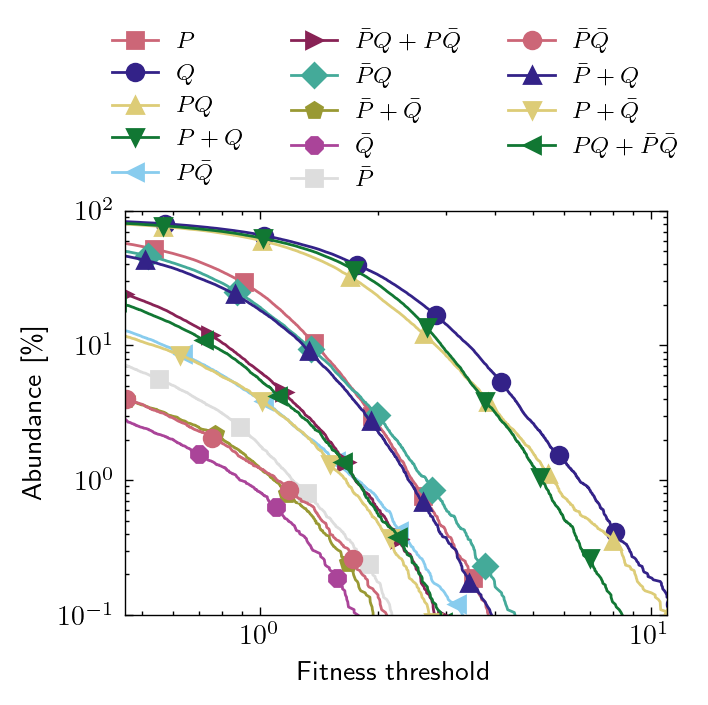

In [19]:
with plt.style.context(["science","muted"]):
    
    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for i, gate in enumerate(gates):

        ax = dfa.plot(x=f'{gate} Fitness', y=f'{gate} Fitness Abundance', ax=ax, label=gate, marker=markers[i], markevery=0.15)
    
    ax.set_xlabel('Fitness threshold')
    ax.set_ylabel('Abundance [\%]')
    ax.set_ylim(0.1,100)
    ax.set_xlim(0.45,11)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(labels, ncol=3, fontsize='small', loc='center', bbox_to_anchor=(0.5,1.25))
    fig.savefig("plots/sim_results.pdf", bbox_inches='tight')